In [1]:
!pip install -qqq -U transformers datasets bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset
from huggingface_hub import login
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import os


hf_api_key = os.getenv("HF_TOKEN")
login(token="hf_api_key")


tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [182]:
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2", load_in_4bit=True)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


In [4]:
dataset = load_dataset("squad", split="train[:5000]")
dataset = dataset.train_test_split(test_size=0.2)


def formatting(example):
    return {
        "prompt": f"### Context:\n{example['context']}\n\n### question:\n{example['question']}",
        "answers": f"### answers:\n{example['answers']['text'][0]}{tokenizer.eos_token}",
    }


dataset = dataset.map(formatting)

README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [179]:
dataset["train"][1]

{'id': '56cedd47aab44d1400b88b49',
 'title': 'Spectre_(2015_film)',
 'context': "Thomas Newman returned as Spectre's composer. Rather than composing the score once the film had moved into post-production, Newman worked during filming. The theatrical trailer released in July 2015 contained a rendition of John Barry's On Her Majesty's Secret Service theme. Mendes revealed that the final film would have more than one hundred minutes of music. The soundtrack album was released on 23 October 2015 in the UK and 6 November 2015 in the USA on the Decca Records label.",
 'question': 'What company published the Spectre soundtrack?',
 'answers': '### answers:\nDecca Records<|endoftext|>',
 'prompt': "### Context:\nThomas Newman returned as Spectre's composer. Rather than composing the score once the film had moved into post-production, Newman worked during filming. The theatrical trailer released in July 2015 contained a rendition of John Barry's On Her Majesty's Secret Service theme. Mendes reve

## Creation of Dataloader class

In [42]:
class DataLoader:
    def __init__(self, B, T) -> None:
        self.B = B
        self.T = T

    def _processing(self, seq):
        """
        Processes a token sequence to make sure it has exactly T+1 tokens,
        so that we can safely do x = seq[:T] and y = seq[1:T+1] without any error.
        """
        eos_tensor = torch.tensor(
            tokenizer.encode(tokenizer.eos_token), dtype=seq.dtype
        )

        # Truncation (We keep last T tokens, and we add EOS tokens to reach T+1)
        if len(seq) > self.T:
            return torch.cat((seq[-self.T :], eos_tensor))

        # Padding (We add EOS + padding EOS to reach T+1 tokens)
        if len(seq) < self.T:
            pad_len = self.T - len(seq) + 1
            padding = torch.full((pad_len,), eos_tensor[0], dtype=seq.dtype)
            return torch.cat((seq, padding))

        # Exactly T → we add EOS to reach T+1
        return torch.cat((seq, eos_tensor))

    def _processing_mask(self, seq):
        """
        same logic here but with adding 0 for padding
        """

        if len(seq) > self.T:
            return torch.cat((seq[-self.T :], torch.tensor([0])))

        if len(seq) < self.T:
            pad_len = self.T - len(seq) + 1
            padding = torch.full((pad_len,), 0, dtype=seq.dtype)
            return torch.cat((seq, padding))

        return torch.cat((seq, torch.tensor([0])))

    def _generate_mask(self, input_ids, target_ids):
        """
        Generates a mask by separating input and target tokens.

        I chose to split input_ids and target_ids to create two distinct masks:
        - 0 for input tokens (no backprop)
        - 1 for target tokens (enable backprop)

        The two masks are then concatenated. This final mask tells the model
        which tokens should contribute to the loss and gradients.
        """

        mask_input_ids = torch.zeros(input_ids.shape[0], dtype=torch.long)
        mask_target_ids = torch.ones(target_ids.shape[0], dtype=torch.long)

        return torch.cat((mask_input_ids, mask_target_ids))

    def load_batch(self, dataset, mode):
        """
        a function that create 3 batchs to feed to the model
        """

        dataset = dataset["train"] if mode == "train" else dataset["test"]
        batch_x = []
        batch_y = []
        batch_mask = []

        # We generate B index to pick B exemple from the dataset
        idx = torch.randint(0, len(dataset), (self.B,))

        # For each index, we create sequences x, y , mask
        for id in idx:
            input_ids = torch.tensor(
                tokenizer.encode(dataset["prompt"][id])
            )  # 1D Tensor
            target_ids = torch.tensor(
                tokenizer.encode(dataset["answers"][id])
            )  # 1D Tensor
            mask_ids = self._generate_mask(input_ids, target_ids)
            seq_ids = torch.cat((input_ids, target_ids))

            seq_ids = self._processing(seq_ids)
            mask_ids = self._processing_mask(mask_ids)

            x = seq_ids[: self.T]
            y = seq_ids[1 : self.T + 1]
            loss_mask = mask_ids[1:]

            assert x.shape[0] == self.T, f"x shape mismatch {x.shape}"
            assert y.shape[0] == self.T, f"y shape mismatch {y.shape}"
            assert (
                loss_mask.shape[0] == self.T
            ), f"loss_mask shape mismatch {loss_mask.shape}"

            batch_x.append(x)
            batch_y.append(y)
            batch_mask.append(loss_mask)

        batch_x, batch_y, batch_mask = (
            torch.stack(batch_x),
            torch.stack(batch_y),
            torch.stack(batch_mask),
        )

        assert batch_x.shape == (
            self.B,
            self.T,
        ), f"batch_x shape mismatch: {batch_x.shape}"
        assert batch_y.shape == (
            self.B,
            self.T,
        ), f"batch_y shape mismatch: {batch_y.shape}"
        assert batch_mask.shape == (
            self.B,
            self.T,
        ), f"batch_mask shape mismatch: {batch_mask.shape}"

        # Return batch of shape B,T

        return batch_x, batch_y, batch_mask

## Creating an Adapter Based on LoRA Method

In this section, we will create an adapter using the LoRA (Low-Rank Adaptation) method.

In [125]:
import torch.nn as nn


class AdapterModel:
    """
    AdapterModel class wraps a base model to prepare it for parameter-efficient fine-tuning.

    I created this to inject adapter layers (with A and B matrices) into specific target modules
    of the model we want to fine-tune. The class takes:

    - `model`: the base pre-trained model (like GPT-2) that we want to fine-tune
    - `target_modules`: a list of strings identifying which submodules to modify (like attention layers)

    The `_frozen_weight_base_model()` method freezes all the original weights so we only train adapters.

    The `_adapt_layer()` method walks through the model structure to find each target module
    (either `nn.Linear` or GPT-2 style Conv1D), and replaces it with a `LoraAdapter` layer
    that wraps the original one. This is done by recursively traversing the model using the module name path.

    The `get_model()` function just returns the adapted model, ready for training only the injected parameters.
    """

    def __init__(self, model: nn.Module, target_modules: list[str]):
        self.model = model
        self.target_modules = target_modules
        self._frozen_weight_base_model(model)
        self._adapt_layer()

    def _frozen_weight_base_model(self, model):
        for p in model.parameters():
            p.requires_grad = False

    def _adapt_layer(self):
        def is_gpt2_conv1d(module):
            return hasattr(module, "nf") and hasattr(module, "nx")

        def is_target_linear(module):
            return hasattr(module, "in_features") and hasattr(module, "out_features")

        for target in self.target_modules:
            for name, m in self.model.named_modules():
                if (is_target_linear(m) or is_gpt2_conv1d(m)) and (target in name):
                    path = name.split(".")
                    current_parent = self.model
                    for module_name in path:
                        child = getattr(current_parent, module_name)
                        if target == module_name:
                            setattr(
                                current_parent,
                                module_name,
                                LoraAdapter(base_module=child),
                            )
                        current_parent = child

    def get_model(self):
        return self.model


class LoraAdapter(nn.Module):
    """LoraAdapter wraps a base module (Linear or GPT-2 style Conv1D) and injects two trainable low-rank matrices A and B.

    I designed this to simulate the LoRA mechanism by keeping the original weights frozen and only training the adapter layers.

    - `base_module`: the original frozen layer (e.g., Linear or Conv1D) we want to wrap
    - `rank`: the low-rank dimension used for the adapter (default 8)
    - `lora_alpha`: a scaling factor applied to the adapter output
    - `lora_dropout`: dropout applied between A and B during training

    In the constructor:
    - I infer the input and output dimensions from the base module
    - I initialize matrix A (input → rank) and B (rank → output)
    - I set the weights of B to zeros so that the adapter does nothing at the beginning — the model behaves like the base one initially

    In the `forward()`:
    - I run the input `x` through the base module to get `base_out`
    - Then I compute the adapter output via A and B (with dropout), scale it by `lora_alpha`, and add it to `base_out`

    This way, the model learns to adjust its behavior through A and B while keeping the original weights intact.
    magics ! :))))
    """

    def __init__(
        self,
        base_module,
        rank: int = 8,
        lora_alpha: int = 16,
        lora_dropout: float = 0.2,
    ):
        super().__init__()
        self.base_module = base_module
        self.lora_alpha = lora_alpha
        if hasattr(base_module, "in_features") and hasattr(base_module, "out_features"):
            in_dim = base_module.in_features
            out_dim = base_module.out_features
        elif hasattr(base_module, "nx") and hasattr(base_module, "nf"):
            in_dim = base_module.nx
            out_dim = base_module.nf
        else:
            raise ValueError("Module type not supported for LoRA adapter")

        self.adapter_A = nn.Linear(in_dim, rank, bias=False)
        self.adapter_B = nn.Linear(rank, out_dim, bias=False)

        self.dropout = nn.Dropout(p=lora_dropout)
        torch.nn.init.zeros_(self.adapter_B.weight)

        torch.nn.init.normal_(self.adapter_A.weight, mean=0.0, std=0.01)

    def forward(self, x):
        self.adapter_A = self.adapter_A.to(dtype=x.dtype)
        self.adapter_B = self.adapter_B.to(dtype=x.dtype)
        self.dropout = self.dropout.to(dtype=x.dtype)

        base_out = self.base_module(x)
        lora_out = self.dropout(self.adapter_B(self.adapter_A(x)))

        return base_out + self.lora_alpha * lora_out

# Base model architecture

In [183]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Linear4bit(in_features=768, out_features=2304, bias=True)
          (c_proj): Linear4bit(in_features=768, out_features=768, bias=True)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Linear4bit(in_features=768, out_features=3072, bias=True)
          (c_proj): Linear4bit(in_features=3072, out_features=768, bias=True)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affin

# Apply adapter 

In [184]:
lora_model = AdapterModel(model, ["c_attn"])
model = lora_model.get_model()
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): LoraAdapter(
            (base_module): Linear4bit(in_features=768, out_features=2304, bias=True)
            (adapter_A): Linear(in_features=768, out_features=8, bias=False)
            (adapter_B): Linear(in_features=8, out_features=2304, bias=False)
            (dropout): Dropout(p=0.2, inplace=False)
          )
          (c_proj): Linear4bit(in_features=768, out_features=768, bias=True)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Linear4bit(in_features=768, out_features=3072,

In [185]:
model = lora_model.get_model()

In [186]:
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
model.to(device)
torch.compile(model)

OptimizedModule(
  (_orig_mod): GPT2LMHeadModel(
    (transformer): GPT2Model(
      (wte): Embedding(50257, 768)
      (wpe): Embedding(1024, 768)
      (drop): Dropout(p=0.1, inplace=False)
      (h): ModuleList(
        (0-11): 12 x GPT2Block(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): GPT2Attention(
            (c_attn): LoraAdapter(
              (base_module): Linear4bit(in_features=768, out_features=2304, bias=True)
              (adapter_A): Linear(in_features=768, out_features=8, bias=False)
              (adapter_B): Linear(in_features=8, out_features=2304, bias=False)
              (dropout): Dropout(p=0.2, inplace=False)
            )
            (c_proj): Linear4bit(in_features=768, out_features=768, bias=True)
            (attn_dropout): Dropout(p=0.1, inplace=False)
            (resid_dropout): Dropout(p=0.1, inplace=False)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): G

In [187]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name} | shape: {param.shape} | requires_grad={param.requires_grad}")

trainable_params = [p for p in model.parameters() if p.requires_grad]
trainable_params = [p for p in model.parameters() if p.requires_grad]
total_trainable = sum(p.numel() for p in trainable_params)
print(f"Nombre total d'éléments trainables: {total_trainable}")

transformer.h.0.attn.c_attn.adapter_A.weight | shape: torch.Size([8, 768]) | requires_grad=True
transformer.h.0.attn.c_attn.adapter_B.weight | shape: torch.Size([2304, 8]) | requires_grad=True
transformer.h.1.attn.c_attn.adapter_A.weight | shape: torch.Size([8, 768]) | requires_grad=True
transformer.h.1.attn.c_attn.adapter_B.weight | shape: torch.Size([2304, 8]) | requires_grad=True
transformer.h.2.attn.c_attn.adapter_A.weight | shape: torch.Size([8, 768]) | requires_grad=True
transformer.h.2.attn.c_attn.adapter_B.weight | shape: torch.Size([2304, 8]) | requires_grad=True
transformer.h.3.attn.c_attn.adapter_A.weight | shape: torch.Size([8, 768]) | requires_grad=True
transformer.h.3.attn.c_attn.adapter_B.weight | shape: torch.Size([2304, 8]) | requires_grad=True
transformer.h.4.attn.c_attn.adapter_A.weight | shape: torch.Size([8, 768]) | requires_grad=True
transformer.h.4.attn.c_attn.adapter_B.weight | shape: torch.Size([2304, 8]) | requires_grad=True
transformer.h.5.attn.c_attn.adapter

In [188]:
from torch.optim.lr_scheduler import CosineAnnealingLR

optimizer = torch.optim.Adam([p for p in model.parameters() if p.requires_grad], 1e-5)

scheduler = CosineAnnealingLR(optimizer, T_max=600, eta_min=1e-6)

# Training

/tmp/ipython-input-190-2317885067.py:3: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/tmp/ipython-input-190-2317885067.py:43: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch 0 Batch 0 - Loss: 1.5292 Avg: 1.5292
Epoch 0 Batch 1 - Loss: 1.4870 Avg: 1.5081
Epoch 0 Batch 2 - Loss: 2.0035 Avg: 1.6732
Epoch 0 Batch 3 - Loss: 1.8603 Avg: 1.7200
Epoch 0 Batch 4 - Loss: 1.5955 Avg: 1.6951
Epoch 0 Batch 5 - Loss: 1.5424 Avg: 1.6697
Epoch 0 Batch 6 - Loss: 1.4543 Avg: 1.6389
Epoch 0 Batch 7 - Loss: 1.3981 Avg: 1.6088
Epoch 0 Batch 8 - Loss: 1.7260 Avg: 1.6218
Epoch 0 Batch 9 - Loss: 1.3524 Avg: 1.5949
Epoch 0 Batch 10 - Loss: 1.5950 Avg: 1.5949
Epoch 0 Batch 11 - Loss: 1.4353 Avg: 1.5816
Epoch 0 Batch 12 - Loss: 1.4435 Avg: 1.5710
Epoch 0 Batch 13 - Loss: 1.2947 Avg: 1.5512
Epoch 0 Batch 14 - Loss: 1.3383 Avg: 1.5370
Epoch 0 Batch 15 - Loss: 2.0467 Avg: 1.5689
Epoch 0 Batch 16 - Loss: 1.3585 Avg: 1.5565
Epoch 0 Batch 17 - Loss: 1.3636 Avg: 1.5458
Epoch 0 Batch 18 - Loss: 1.3252 Avg: 1.5342
Epoch 0 Batch 19 - Loss: 1.4555 Avg: 1.5303
Epoch 0 Batch 20 - Loss: 1.6124 Avg: 1.5342
Epoch 0 Batch 21 - Loss: 1.4331 Avg: 1.5296
Epoch 0 Batch 22 - Loss: 1.8964 Avg: 1.545

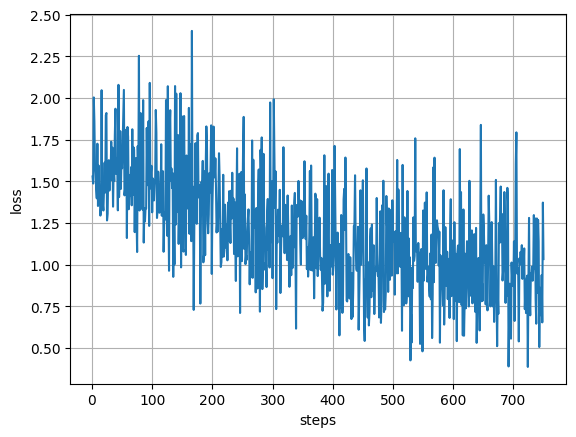

In [190]:
import torch.nn.functional as F

scaler = torch.cuda.amp.GradScaler()
dataloader = DataLoader(B=6, T=512)


def cross_entropy_with_mask(logits, labels, mask):
    """
    Compute cross-entropy loss using a mask to ignore some tokens.

    Given the logits from the model's inference, we use the mask generated by the dataloader
    to decide which tokens in the labels we want to compute the loss on. If the mask is 0,
    we set the corresponding label to -100 so it gets ignored by PyTorch's cross-entropy loss
    (with ignore_index=-100). This way, loss.backward() will only optimize the weights for the
    positions where the mask is 1, meaning where we want to compute the loss.
    """

    label_masked = labels.clone()
    label_masked[mask == 0] = -100
    B, T, V = logits.size()
    logits_flat = logits.view(B * T, V)
    labels_flat = label_masked.view(B * T)
    loss = F.cross_entropy(logits_flat, labels_flat, ignore_index=-100)
    return loss


model = model.to(device)
losses = []
steps = []
step = 0
for epoch in range(25):
    batchs = [dataloader.load_batch(dataset=dataset, mode="train") for _ in range(30)]
    x, y, mask = batchs[0]
    model.train()
    total_loss = 0
    for idx, batch in enumerate(batchs):
        optimizer.zero_grad(set_to_none=True)

        x, y, mask = batch
        x = x.to(device=device, dtype=torch.long)
        y = y.to(device)
        mask = mask.to(device)

        # Autocast enable mixed precision because we load model in float16
        with torch.cuda.amp.autocast():
            out = model(input_ids=x, labels=y)
            loss = cross_entropy_with_mask(out.logits, y, mask)

        # we have to scale grad
        scaler.scale(loss).backward()

        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Optimizer step
        scaler.step(optimizer)

        scaler.update()
        scheduler.step()
        losses.append(loss.item())
        step += 1
        steps.append(step)

        total_loss += loss.item()

        print(
            f"Epoch {epoch} Batch {idx} - Loss: {loss.item():.4f} "
            f"Avg: {total_loss / (idx + 1):.4f}"
        )

import matplotlib.pyplot as plt

plt.xlabel("steps")
plt.ylabel("loss")
plt.plot(steps, losses)
plt.grid(True)
plt.show()


torch.save(model.state_dict(), f"checkpoint_epoch_{epoch}.pt")


In [193]:
def generate_sample(model, tokenizer, prompt, max_len=20, device="cpu"):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
        for _ in range(max_len):
            outputs = model(input_ids=input_ids)
            logits = outputs.logits
            next_token_logits = logits[:, -1, :]
            next_token = torch.argmax(next_token_logits, dim=-1, keepdim=True)
            input_ids = torch.cat([input_ids, next_token], dim=-1)
        generated_text = tokenizer.decode(input_ids[0].tolist())
    return generated_text


prompt = "what is a LLM?"
generated = generate_sample(model, tokenizer, prompt, max_len=30, device=device)

In [194]:
generated

'what is a LLM?\n\nThe LLM is a collection of functions that are implemented in a single function.\n\nThe functions are implemented in a single function.\n'